Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
data=pd.read_csv("gold.csv")
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Checking null values

In [7]:
data.isnull().sum()*100/len(data)

Date       0.0
SPX        0.0
GLD        0.0
USO        0.0
SLV        0.0
EUR/USD    0.0
dtype: float64

In [13]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [19]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation=numerical_data.corr()

Correlation:
1)positive Correlation (above 0) 
2)negative Correlation (below 0)

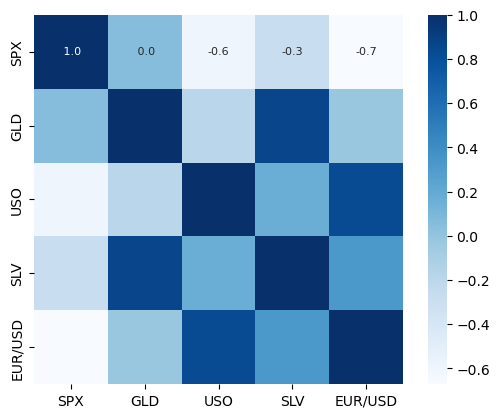

In [34]:
sns.heatmap(correlation,cbar=True,square=True,annot=True,fmt=" .1f",annot_kws={'size':8},cmap="Blues")
plt.show()

In [36]:
#correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


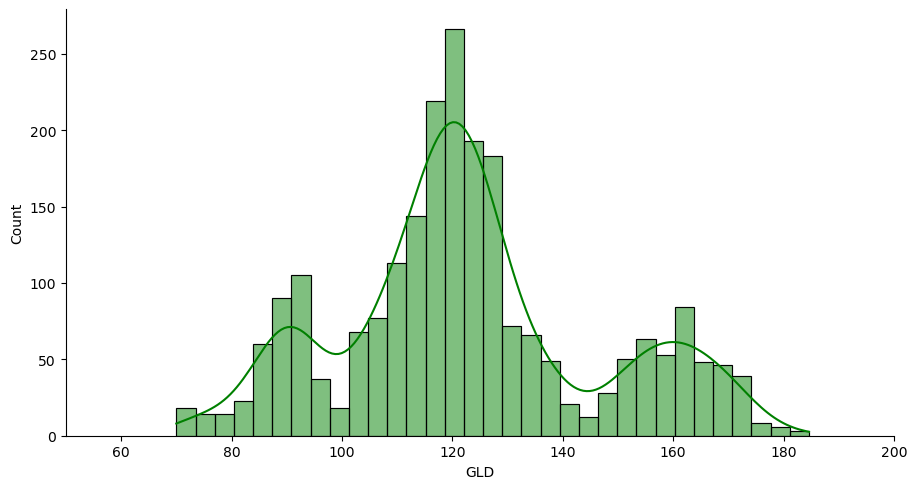

In [53]:
plot=sns.displot(data=data['GLD'],kde=True,color='g')
plot.fig.set_figwidth(10)
plot.fig.set_figheight(5)
plt.xlim(50,200)
plt.show()

In [55]:
x=data.drop(['GLD','Date'],axis=1)
y=data['GLD']

Splitting test and train data

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=12)

In [60]:
x_train.shape

(2061, 4)

In [61]:
x_test.shape

(229, 4)

Training the model with Random Forest Regressor

In [62]:
model=RandomForestRegressor(n_estimators=100)

In [63]:
#training the model
model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
Model Evaluation

In [64]:
test_data_prediction=model.predict(x_test)

In [66]:
error_score=metrics.r2_score(test_data_prediction,y_test)
print(error_score)

0.9852035059107778
